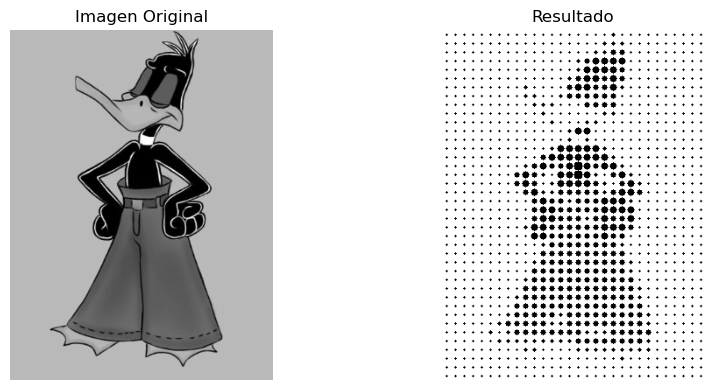

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pato.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (300, 400))

dot_image = np.ones_like(image) * 255 
block_size = 10
max_radius = block_size // 2

for y in range(0, image.shape[0], block_size):
    for x in range(0, image.shape[1], block_size):
        
        block = image[y:y+block_size, x:x+block_size]
        avg = np.mean(block)
        
        
        radius = max_radius * (1 - avg / 255)

        center_x = x + block_size // 2
        center_y = y + block_size // 2
        cv2.circle(dot_image, (center_x, center_y), int(radius), 0, -1)  

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Resultado")
plt.imshow(dot_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


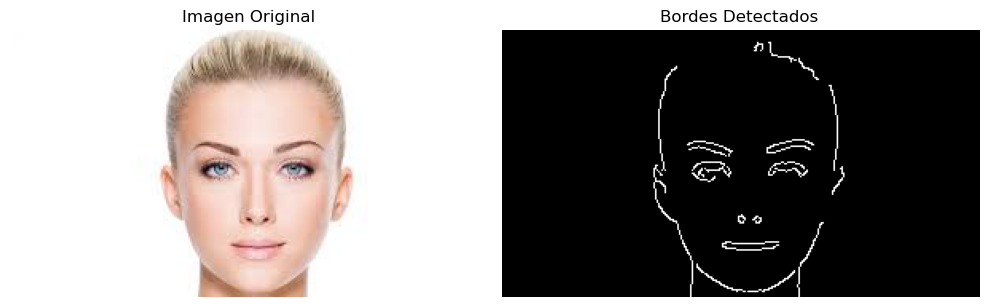

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img2.jpg') 
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

desenfoque = cv2.GaussianBlur(gris, (5, 5), 1.4)

bordes = cv2.Canny(desenfoque, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Bordes Detectados ")
plt.imshow(bordes, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


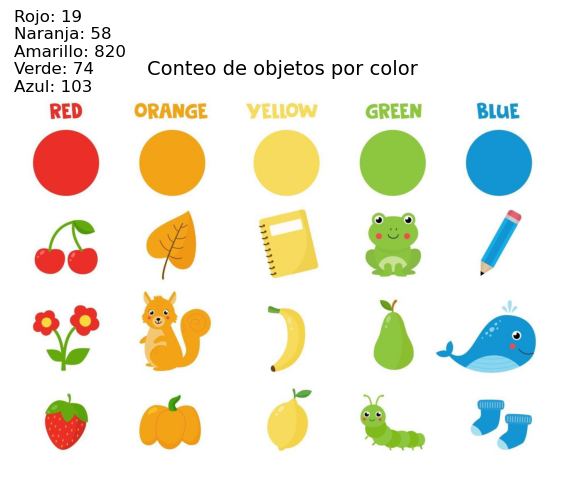

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_path = "colores.jpg"  
image = Image.open(image_path).convert('RGB')
img_np = np.array(image)

color_ranges = {
    'Rojo': [(200, 0, 0), (255, 80, 80)],
    'Naranja': [(220, 100, 0), (255, 180, 80)],
    'Amarillo': [(230, 230, 0), (255, 255, 180)],
    'Verde': [(0, 150, 0), (120, 255, 120)],
    'Azul': [(0, 100, 200), (100, 180, 255)]
}

def count_objects_by_color(image_np, ranges):
    counts = {}
    for color, (lower, upper) in ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(image_np, lower, upper)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        counts[color] = len(contours)
    return counts

object_counts = count_objects_by_color(img_np, color_ranges)
conteo_texto = "\n".join([f"{color}: {n}" for color, n in object_counts.items()])

plt.figure(figsize=(10, 5))
plt.imshow(img_np)
plt.axis("off")
plt.title("Conteo de objetos por color", fontsize=14)
plt.text(10, 20, conteo_texto, fontsize=12, color='black', backgroundcolor='white')
plt.show()


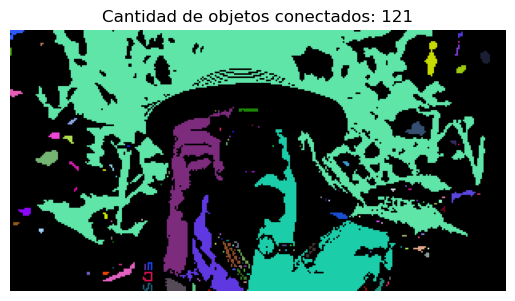

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_componentes(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    _, binarizada = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    cant, region = cv2.connectedComponents(binarizada)
    colores = np.zeros((cant, 3), dtype=np.uint8)
    colores[0] = [0, 0, 0]  
    colores[1:] = np.random.randint(0, 255, size=(cant - 1, 3), dtype=np.uint8)  # Colores aleatorios para los objetos
    
    imagen_coloreada = np.zeros((*region.shape, 3), dtype=np.uint8)
    for i in range(cant):
        imagen_coloreada[region == i] = colores[i]
    
    return imagen_coloreada, cant - 1  
imagen = cv2.imread("img3.jpg")
imagen_coloreada, cantidad_objetos = contar_componentes(imagen)

plt.imshow(cv2.cvtColor(imagen_coloreada, cv2.COLOR_BGR2RGB))
plt.title(f'Cantidad de objetos conectados: {cantidad_objetos}')
plt.axis('off')
plt.show()
